# OutputGridSizeSolver()

In [1]:
import pprint
from collections import defaultdict
from src.plot import plot_task, plot_one
from src.datamodel.DataModel import Competition
from src.abstract_solver.old.OutputGridSolver import OutputGridSizeSolver
from pydash import py_ as _
from IPython.core.display import HTML, display

%load_ext autoreload
%autoreload 2

In [2]:
solver      = OutputGridSizeSolver()
competition = Competition()
files  = { name: defaultdict(list) for name in competition.keys() }
counts = { name: defaultdict(int)  for name in competition.keys() }
for name, dataset in competition.items():
    for task in dataset:
        rule = solver.fit(task)
        files[name][rule and rule.name].append(task.filename)
        counts[name][rule and rule.name] += 1

print('Counts')
pprint.pprint(counts)

Counts
{'evaluation': defaultdict(<class 'int'>,
                           {None: 50,
                            'GridSizeFixedSizeOutput': 16,
                            'GridSizeInputRatio': 24,
                            'GridSizeIntegerDivisor': 26,
                            'GridSizeIntegerMultiple': 14,
                            'GridSizeSame': 270}),
 'test': defaultdict(<class 'int'>,
                     {None: 12,
                      'GridSizeFixedSizeOutput': 6,
                      'GridSizeInputRatio': 6,
                      'GridSizeIntegerDivisor': 8,
                      'GridSizeIntegerMultiple': 3,
                      'GridSizeSame': 65}),
 'training': defaultdict(<class 'int'>,
                         {None: 55,
                          'GridSizeFixedSizeOutput': 14,
                          'GridSizeInputRatio': 32,
                          'GridSizeIntegerDivisor': 24,
                          'GridSizeIntegerMultiple': 13,
                    

In [3]:
rulenames = (
    _(counts)
    .map(lambda d: d.keys())
    .map(list)
    .flatten()
    .uniq()
    .without(None)
    .value()
)
rulenames

['GridSizeIntegerDivisor',
 'GridSizeSame',
 'GridSizeInputRatio',
 'GridSizeFixedSizeOutput',
 'GridSizeIntegerMultiple']

# OutputGridSizeSolver() Successes

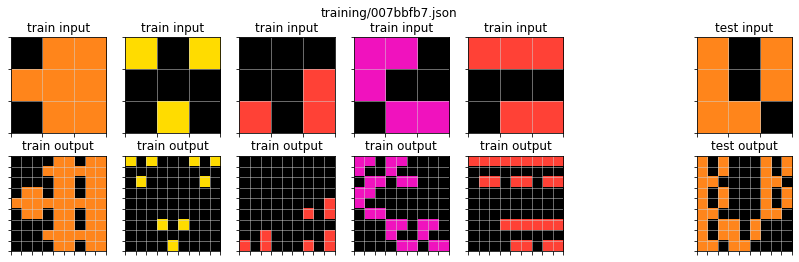

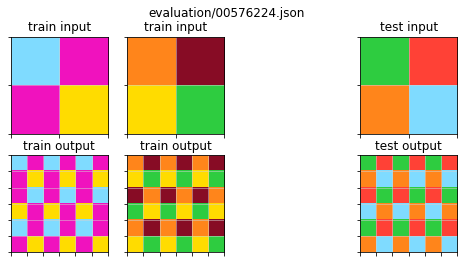

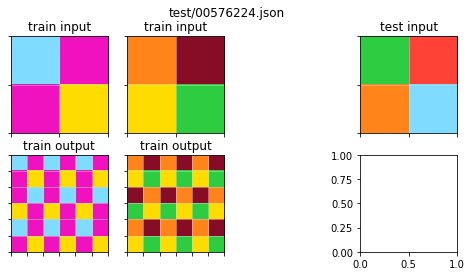

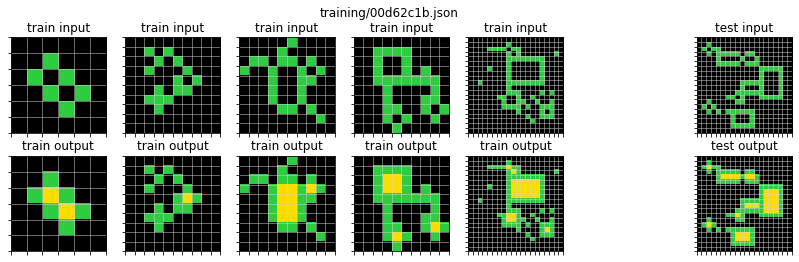

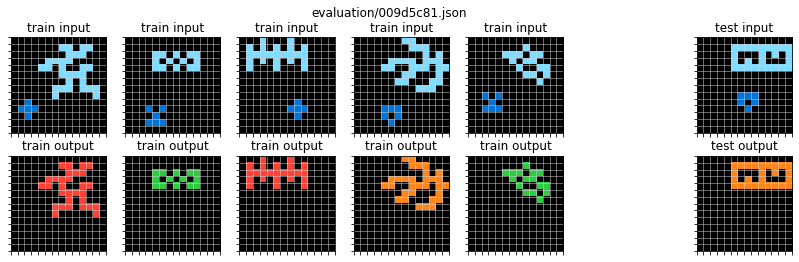

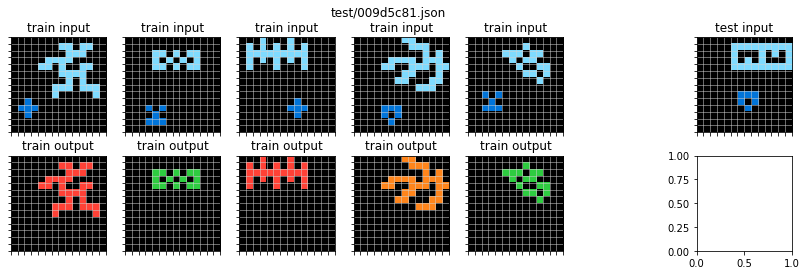

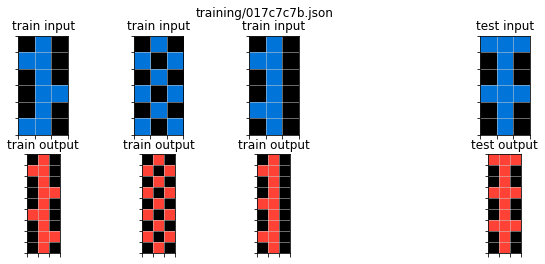

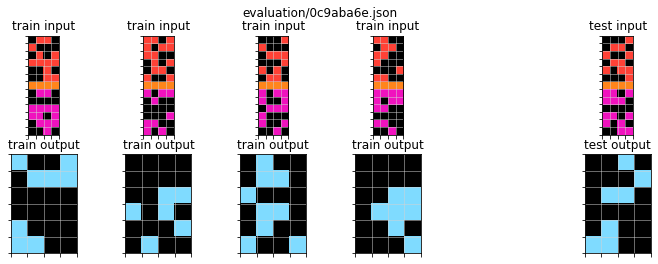

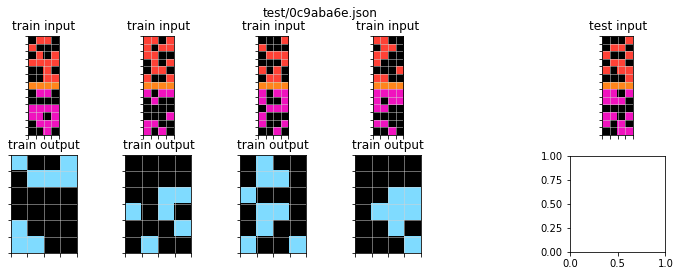

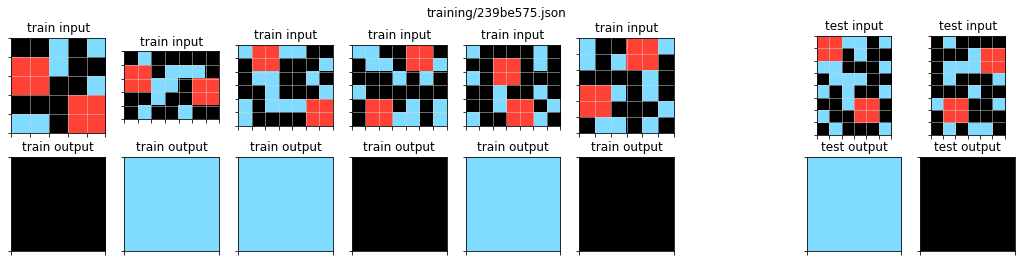

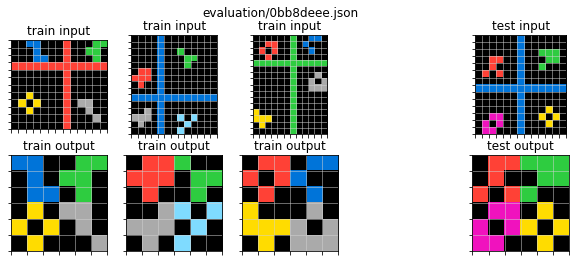

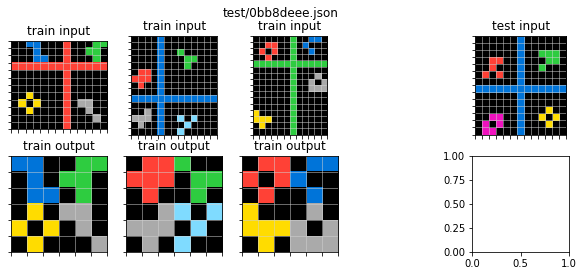

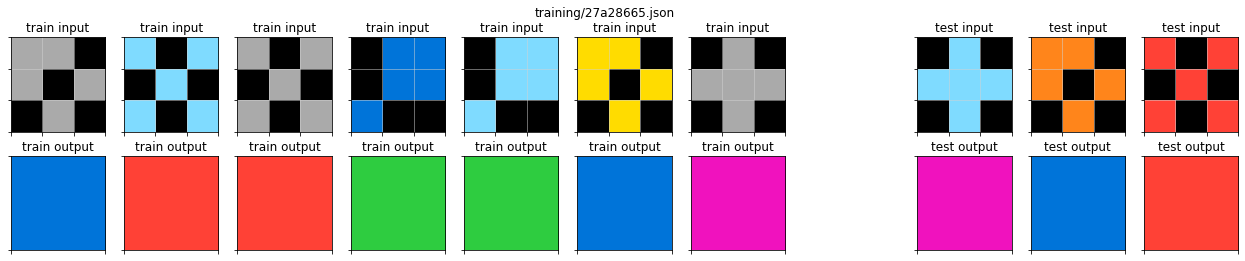

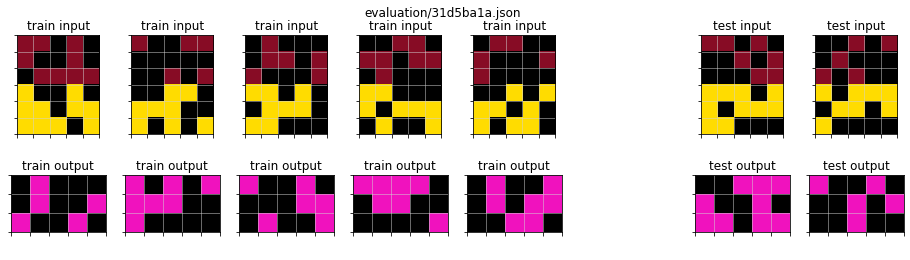

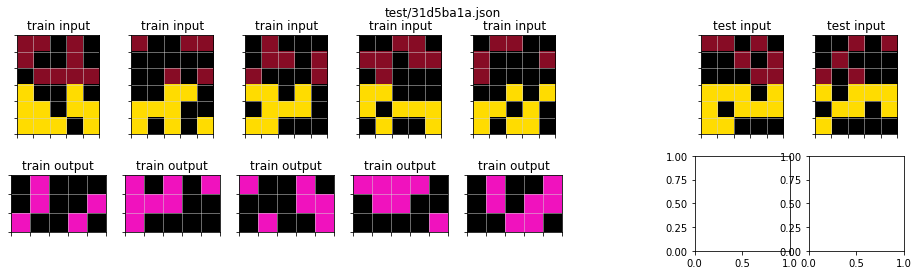

In [4]:
for rulename in rulenames:
    display(HTML(f'<h2>{rulename} Top 3 - Success</h2>'))
    for name, dataset in competition.items():
        if rulename not in files[name]: continue
        for filename in files[name][rulename][:1]:   # x3 dataset names
            plot_task(filename)

# OutputGridSizeSolver() Failures

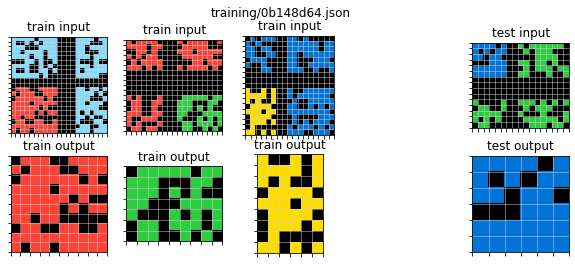

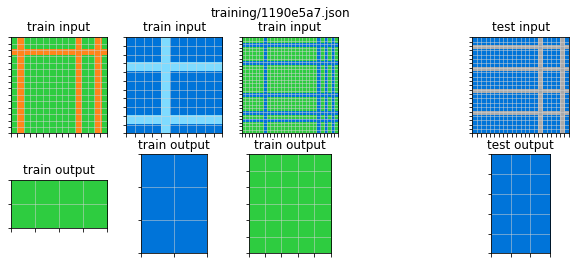

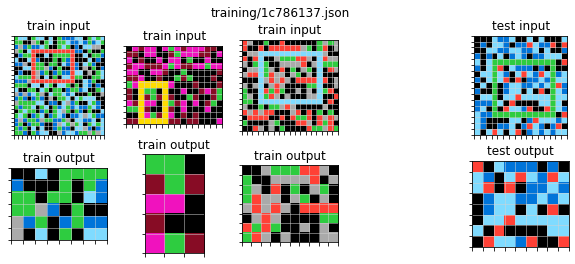

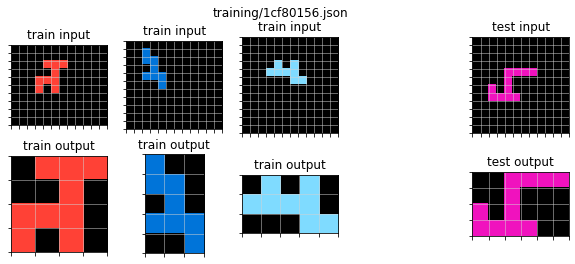

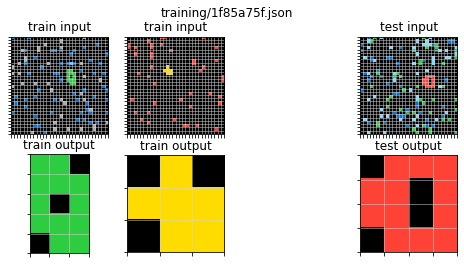

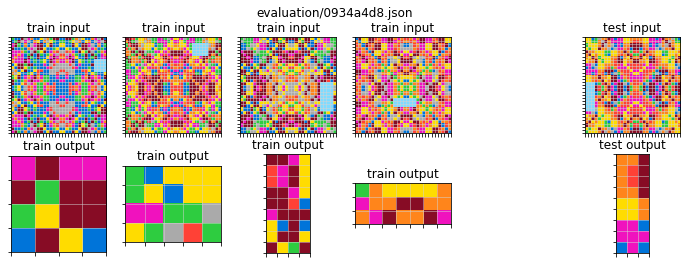

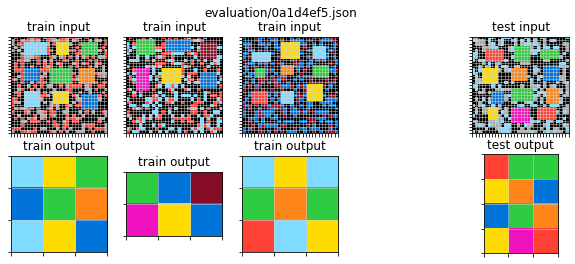

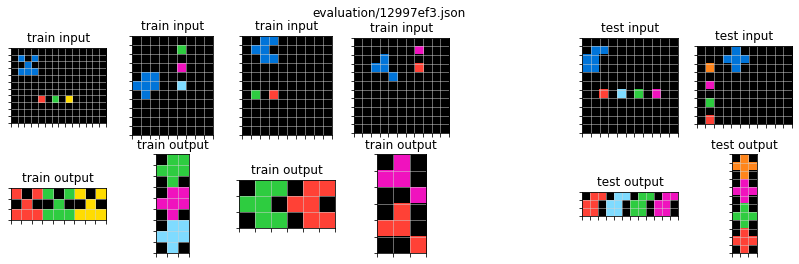

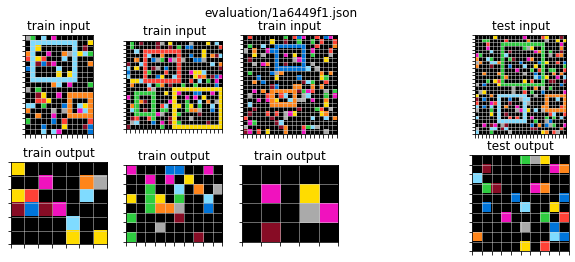

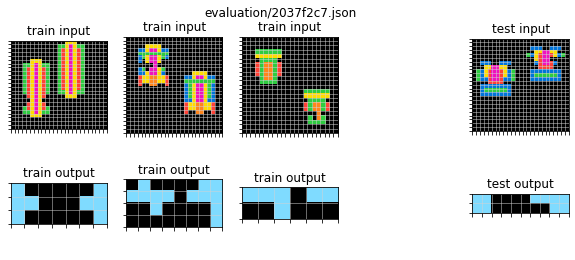

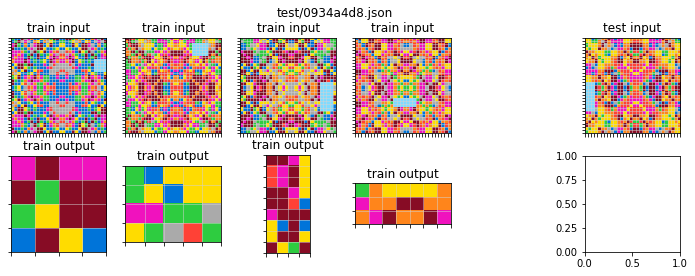

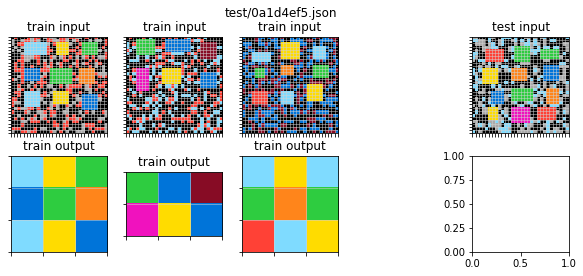

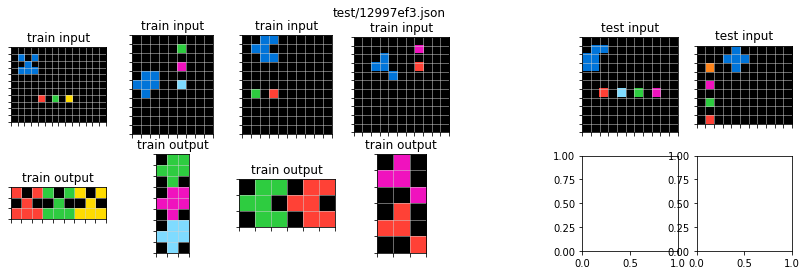

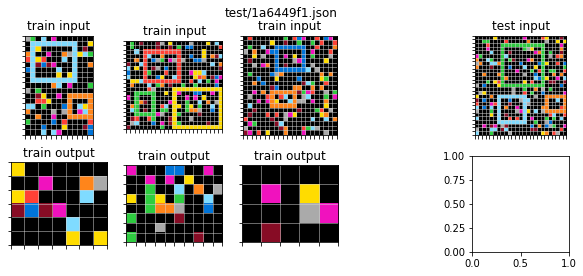

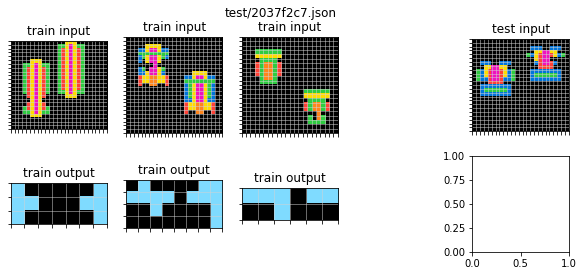

In [5]:
for name, dataset in competition.items():
    display(HTML(f'<h2>{name} 5 / {len(files[name][None])} - Failure</h2>'))
    for filename in files[name][None][:5]:
        plot_task(filename)
